In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium
from folium import plugins

plt.rcParams['figure.figsize'] = 10,12


import warnings
warnings.filterwarnings('ignore')



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df = pd.read_csv('/covid_19_india.csv')
df_india = df.copy()
df

Sno      Date     Time  ... Cured Deaths Confirmed
0        1  30/01/20  6:00 PM  ...     0      0         1
1        2  31/01/20  6:00 PM  ...     0      0         1
2        3  01/02/20  6:00 PM  ...     0      0         2
3        4  02/02/20  6:00 PM  ...     0      0         3
4        5  03/02/20  6:00 PM  ...     0      0         3
...    ...       ...      ...  ...   ...    ...       ...
2337  2338  26/05/20  8:00 AM  ...   165      0       194
2338  2339  26/05/20  8:00 AM  ...    58      3       349
2339  2340  26/05/20  8:00 AM  ...  3581    165      6532
2340  2341  26/05/20  8:00 AM  ...  1414    278      3816
2341  2342  26/05/20  8:00 AM  ...     0      0      2970

[2342 rows x 9 columns]

In [5]:
India_coord = pd.read_csv('/datasets_565688_1027235_Indian Coordinates.csv')
print(India_coord)

dbd_India = pd.read_excel('/per_day_cases_India.xlsx',parse_dates=True)
print(dbd_India)
dbd_Italy = pd.read_excel('/per_day_case_Italy.xlsx',parse_dates=True)
dbd_Korea = pd.read_excel('/per_day_case_Korea.xlsx',parse_dates=True)
dbd_Wuhan = pd.read_excel('/per_day_cases_Wuhan.xlsx',parse_dates=True)




                      Name of State / UT   Latitude  Longitude
0                   Andaman And Nicobar   11.667026  92.735983
1                         Andhra Pradesh  14.750429  78.570026
2                     Arunachal Pradesh   27.100399  93.616601
3                                 Assam   26.749981  94.216667
4                                 Bihar   25.785414  87.479973
5                            Chandigarh   30.719997  76.780006
6                            Chattisgarh  22.090420  82.159987
7                Dadra And Nagar Haveli   20.266578  73.016618
8                                  Delhi  28.669993  77.230004
9                                   Goa   15.491997  73.818001
10                               Haryana  28.450006  77.019991
11                     Himachal Pradesh   31.100025  77.166597
12  Union Territory of Jammu and Kashmir  33.450000  76.240000
13                            Jharkhand   23.800393  86.419986
14                             Karnataka  12.570381  76

In [6]:

df['Total cases']=df['ConfirmedIndianNational']+df['ConfirmedForeignNational']
total_cases = df['Total cases'].sum()
print('total confirmed cases of covid-19 across india till date( 25th may 2020):',total_cases)


total confirmed cases of covid-19 across india till date( 25th may 2020): 10102030303030303030303030303030303030303030303030303030303030301030101001301060300210101142002301141070300230114701030702010103002114201010114800230702010902010114101010700240702040024015050101141010102050014170121090201010104060014170121010130101010401101060014190121010130101010601401070014190121011130102010601401010700146022032010221030203012110107001460230320101022103030401211010801141102423631010221032306014110109131411025239310101022104230801511010201011131414025244310102052204210408018110103010161503141502624932010201523089104010022130203010251703142015033740603201013015230101110401302313030502010281180714202604574064320102102225211115040130261304070201028129012142033060760713201021026272221060401303013070803010291321141430370878708631020102903021322510704013032131909040103013711414304101018140125310102010290342162251070701303613190101106070603513042116143013055011081302001213101020103303922063410414011001

In [7]:
df.style.background_gradient(cmap='Reds')

# New Section

In [8]:
df['Total cases'] = df['Deaths']+df['Cured']
df['Total Active'] = df['Total cases'] - df['Cured']
df

Tot_Cases = df.groupby('State/UnionTerritory')['Total Active'].sum().sort_values(ascending=False).to_frame()
Tot_Cases.style.background_gradient(cmap ='Reds')


In [0]:
import plotly
plotly.io.renderers.default = 'colab'

In [31]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=dbd_India['Date'], y = dbd_India['Total Cases'], mode='lines+markers',name='Total Cases'))
fig.update_layout(title_text='Trend of Coronavirus Cases in India (Cumulative cases)',plot_bgcolor='rgb(230, 230, 230)')
fig.show()

# New COVID-19 cases reported daily in India

import plotly.express as px
fig = px.bar(dbd_India, x="Date", y="New Cases", barmode='group', height=600)
fig.update_layout(title_text='Coronavirus Cases in India on daily basis',plot_bgcolor='rgb(230, 230, 230)')

fig.show()

In [13]:
# import plotly.express as px
fig = px.bar(dbd_India, x="Date", y="Total Cases", color='Total Cases', orientation='v', height=600,
             title='Confirmed Cases in India', color_discrete_sequence = px.colors.cyclical.IceFire)

'''Colour Scale for plotly
https://plot.ly/python/builtin-colorscales/
'''

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

fig = px.bar(dbd_Italy, x="Date", y="Total Cases", color='Total Cases', orientation='v', height=600,
             title='Confirmed Cases in Italy', color_discrete_sequence = px.colors.cyclical.IceFire)

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

fig = px.bar(dbd_Korea, x="Date", y="Total Cases", color='Total Cases', orientation='v', height=600,
             title='Confirmed Cases in South Korea', color_discrete_sequence = px.colors.cyclical.IceFire)

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()
fig = px.bar(dbd_Wuhan, x="Date", y="Total Cases", color='Total Cases', orientation='v', height=600,
             title='Confirmed Cases in Wuhan', color_discrete_sequence = px.colors.cyclical.IceFire)

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

In [0]:
df = pd.read_csv('/covid_19_clean_complete.csv',parse_dates=['Date'])
df.rename(columns={'ObservationDate':'Date', 'Country/Region':'Country'}, inplace=True)

df_confirmed = pd.read_csv("/datasets_553973_1037611_time_series_covid_19_confirmed.csv")
df_recovered = pd.read_csv("/datasets_553973_1037611_time_series_covid_19_recovered.csv")
df_deaths = pd.read_csv("/datasets_553973_1037611_time_series_covid_19_deaths.csv")

df_confirmed.rename(columns={'Country/Region':'Country'}, inplace=True)
df_recovered.rename(columns={'Country/Region':'Country'}, inplace=True)
df_deaths.rename(columns={'Country/Region':'Country'}, inplace=True)

In [16]:
df_deaths.head()

Province/State    Country      Lat  ...  3/21/20  3/22/20  3/23/20
0            NaN   Thailand  15.0000  ...        1        1      1.0
1            NaN      Japan  36.0000  ...       35       40     40.0
2            NaN  Singapore   1.2833  ...        2        2      2.0
3            NaN      Nepal  28.1667  ...        0        0      0.0
4            NaN   Malaysia   2.5000  ...        4       10     10.0

[5 rows x 66 columns]

In [17]:
df.head()

Province/State    Country      Lat  ...  Confirmed Deaths  Recovered
0            NaN   Thailand  15.0000  ...        2.0    0.0        0.0
1            NaN      Japan  36.0000  ...        2.0    0.0        0.0
2            NaN  Singapore   1.2833  ...        0.0    0.0        0.0
3            NaN      Nepal  28.1667  ...        0.0    0.0        0.0
4            NaN   Malaysia   2.5000  ...        0.0    0.0        0.0

[5 rows x 8 columns]

In [18]:
df2 = df.groupby(["Date", "Country", "Province/State"])[['Date', 'Province/State', 'Country', 'Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
df2.head()

Date    Country  ... Deaths  Recovered
0 2020-01-22  Australia  ...    0.0        0.0
1 2020-01-22  Australia  ...    0.0        0.0
2 2020-01-22  Australia  ...    0.0        0.0
3 2020-01-22  Australia  ...    0.0        0.0
4 2020-01-22  Australia  ...    0.0        0.0

[5 rows x 6 columns]

In [19]:
# Check for India's data
df.query('Country=="India"').groupby("Date")[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

Date  Confirmed  Deaths  Recovered
0  2020-01-22        0.0     0.0        0.0
1  2020-01-23        0.0     0.0        0.0
2  2020-01-24        0.0     0.0        0.0
3  2020-01-25        0.0     0.0        0.0
4  2020-01-26        0.0     0.0        0.0
..        ...        ...     ...        ...
57 2020-03-19      194.0     4.0       15.0
58 2020-03-20      244.0     5.0       20.0
59 2020-03-21      330.0     4.0       23.0
60 2020-03-22      396.0     7.0       27.0
61 2020-03-23      396.0     7.0       27.0

[62 rows x 4 columns]

In [20]:
df.groupby('Date').sum().head()

Lat       Long  Confirmed  Deaths  Recovered
Date                                                          
2020-01-22  7777.4793  1639.7021      554.0    17.0       28.0
2020-01-23  7777.4793  1639.7021      652.0    18.0       30.0
2020-01-24  7777.4793  1639.7021      939.0    26.0       36.0
2020-01-25  7777.4793  1639.7021     1432.0    42.0       39.0
2020-01-26  7777.4793  1639.7021     2113.0    56.0       52.0

In [0]:
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()

In [22]:
fig = go.Figure()
#Plotting datewise confirmed cases
fig.add_trace(go.Scatter(x=confirmed['Date'], y=confirmed['Confirmed'], mode='lines+markers', name='Confirmed',line=dict(color='blue', width=2)))
fig.add_trace(go.Scatter(x=deaths['Date'], y=deaths['Deaths'], mode='lines+markers', name='Deaths', line=dict(color='Red', width=2)))
fig.add_trace(go.Scatter(x=recovered['Date'], y=recovered['Recovered'], mode='lines+markers', name='Recovered', line=dict(color='Green', width=2)))
fig.update_layout(title='Worldwide NCOVID-19 Cases', xaxis_tickfont_size=14,yaxis=dict(title='Number of Cases'))

fig.show()

In [0]:
from fbprophet import Prophet

In [0]:
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()

In [0]:
confirmed.columns = ['ds','y']
#confirmed['ds'] = confirmed['ds'].dt.date
confirmed['ds'] = pd.to_datetime(confirmed['ds'])

In [26]:
confirmed.tail()

ds         y
57 2020-03-19  242708.0
58 2020-03-20  272166.0
59 2020-03-21  304524.0
60 2020-03-22  335955.0
61 2020-03-23  336004.0

In [27]:
m = Prophet(interval_width=0.95)
m.fit(confirmed)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds
64 2020-03-26
65 2020-03-27
66 2020-03-28
67 2020-03-29
68 2020-03-30

In [28]:
#predicting the future with date, and upper and lower limit of y value
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds           yhat     yhat_lower     yhat_upper
64 2020-03-26  355136.872975  333759.398571  376431.389495
65 2020-03-27  372235.326938  350384.404499  392776.053579
66 2020-03-28  388674.964143  367768.140900  408632.034278
67 2020-03-29  405307.954675  384471.669643  428953.138144
68 2020-03-30  418529.648466  397862.683252  440337.732747

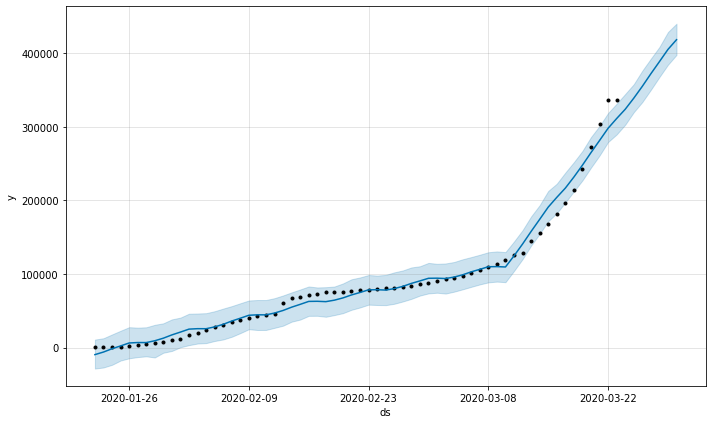

In [29]:
confirmed_forecast_plot = m.plot(forecast)

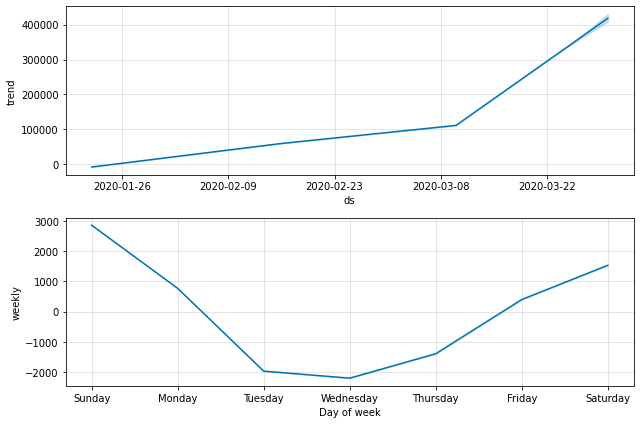

In [30]:
confirmed_forecast_plot =m.plot_components(forecast)